**Tasks**

Combine the tables in a way that lets you answer the following questions:
1. What is the most common age in the social network? How many people share it?
2. List the five people with least posts and reactions combined. (least active people)
3. Create a plot of the friendship graph (up to degree 2) for all users:
named „Jean-Luc Picard“ - named „Jean-Luc Roth“


# **Solution**

**Step 1: Reading the tables from CSV files into pandas dataframe 'friends', 'posts', 'reactions' and 'user' using pandas library**

In [1]:
import pandas as pd
import numpy as np
#reading csv file named 'friends_table.csv' stored in personal github repository using pandas
friends = pd.read_csv("https://raw.githubusercontent.com/Khalidsid/Bigdata_assignment_1/main/friends_table.csv")         

#reading csv file named 'posts_table.csv' stored in personal github repository using pandas
posts = pd.read_csv("https://raw.githubusercontent.com/Khalidsid/Bigdata_assignment_1/main/posts_table.csv")           

#reading csv file named 'reactions_table.csv' stored in personal github repository using pandas
reactions = pd.read_csv("https://raw.githubusercontent.com/Khalidsid/Bigdata_assignment_1/main/reactions_table.csv")    

#reading csv file named 'user_table.csv' stored in personal github repository using pandas
user = pd.read_csv("https://raw.githubusercontent.com/Khalidsid/Bigdata_assignment_1/main/user_table.csv")    

#adding an index column to the table 'user_table' starting from 
user['User'] = user.index + 1

# displaying first 10 rows of all the tables
print("Friends Table\n", friends.head(10), "\n\n") 
print("Posts Table\n",posts.head(10), "\n\n")     
print("Reactions Table\n",reactions.head(10), "\n\n")    
print("User Table\n",user.head(10), "\n\n")                                                                              

Friends Table
    Friend 1  Friend 2
0         1       555
1         1       921
2         1       213
3         1       184
4         1       242
5         1       402
6         1       399
7         1        84
8         1        55
9         2       752 


Posts Table
    User      Post Type   Post Date
0     1          Image  1588166977
1     1  Status_Change  1588167686
2     1           Text  1588168633
3     1          Image  1588163570
4     1          Image  1588168986
5     1          Image  1588163050
6     1  Status_Change  1588163267
7     1          Video  1588163211
8     1          Image  1588166444
9     1  Status_Change  1588163571 


Reactions Table
    User Reaction Type  Reaction Date
0  3741       Comment     1588168107
1   711      Emoticon     1588166846
2   701      Emoticon     1588163334
3  4750      Emoticon     1588168182
4   656       Comment     1588162272
5   673          Like     1588165271
6  6204      Emoticon     1588165833
7  5313          Like     

## **Task 1: What is the most common age in the social network? How many people share it?**
### Procedure:  To answer this question we need the frequency of the 'Age' column from the table 'user'





In [2]:

age_frequency = user['Age'].value_counts()
age_frequency.columns =['Age', 'frequency']
print (age_frequency.head(5))

35    46
30    44
29    41
38    41
33    40
Name: Age, dtype: int64


**Task 1 Answer :** 
After executing the code above, we find that the most common 
Age group is ***35 yrs*** shared by **46 people**


# **Task 2 : List the five people with least posts and reactions combined. (least active people)** 

1.   To answer this question we need frequencies of posts by each user and reactions by each user
2.   Then we need to add these values together for corresponding user.
3. Finally we select the top/bottom 5 based on our requirement



Step1 :Gathering post count for each user

In [3]:
#grouping together and counting the number of elements for each user
post_frequency = posts.groupby(['User']).count()

#Adding a separate count column and storing in a new variable
post_frequency['Post Count'] = posts['User'].value_counts()

#print the table with required values
print (post_frequency['Post Count'])

User
1       18
2       11
3       13
4       15
5       10
        ..
996     12
997     11
998      8
999     23
1000     6
Name: Post Count, Length: 1000, dtype: int64


Step 2 : Gathering reaction count for each user

In [5]:
#counting the number of reactions for each user and Adding a separate count column and storing in a new variable
reaction_frequency = reactions.groupby(['User']).count()
reaction_frequency['Reactions Count'] = reactions['User'].value_counts()

#print the table with required values
print (reaction_frequency['Reactions Count'])

User
17      122
65       91
66      121
67      130
68      115
       ... 
8727    121
8729     98
8948    135
9087    113
9139     97
Name: Reactions Count, Length: 235, dtype: int64


Step 3 : Adding post count and reaction count

In [6]:
#Joining Posts and reaction tables using outer join and replacing NaN values with 0
postandreactions = pd.merge(post_frequency,reaction_frequency,on='User',how='outer').fillna(0)

#Creating New Column 'total_activity' to add total posts and comments by each user
postandreactions['total_activity'] = postandreactions['Post Count'] + postandreactions['Reactions Count']

#Sorting the table in ascending order of 'total_activity' value and displaying the first 5 elements.  
activity = postandreactions.sort_values(by=['total_activity'])

#Selecting least 5 active users
least_active= activity[['total_activity']].head(5)
print(least_active)


      total_activity
User                
435              2.0
233              2.0
135              2.0
454              2.0
439              2.0


**Task 2 Answer** : List of 5 users with least no. of posts and reactions combined is shown in below code block

In [13]:
#finding the names of users using the iUser using inner join with 'least_active' table and 'user' table on User id

least_active_users = pd.merge(least_active, user, on='User', how='inner')

print(least_active_users)

   User  total_activity   Surname     Name  Age  Subscription Date
0   435             2.0  Di Lillo      Lee   43         1588162875
1   233             2.0     Smith     Hans   31         1588163964
2   135             2.0    Picard  Andreas   33         1588158107
3   454             2.0   Mueller      Ali   35         1588158362
4   439             2.0     Smith   Thomas   37         1588162598


# **Task 3 : Network graph** 

Create a plot of the friendship graph (up to degree 2) for all users: 
- named „Jean-Luc Picard“ 
- named „Jean-Luc Roth“

Step1: Finding the Users (Nodes)

In [ ]:
#Selecting the nodes Table containing the users named Jean - Luc Picard and Jean Luc Roth
surnames = ['Picard', 'Roth']
node_list = user.loc[(user.Name == 'Jean-Luc') & (user.Surname.isin(surnames))]

print(node_list)



     User Surname      Name  Age  Subscription Date
76     77    Roth  Jean-Luc   40         1588150286
330   331    Roth  Jean-Luc   25         1588156458
369   370    Roth  Jean-Luc   35         1588155440
897   898    Roth  Jean-Luc   29         1588161280


'\nnode_list = user[["User", "Surname","Name","Age","Subscription Date"]]\nnode_list.head(5)'

*From* above result it is clear that there is no user called 'Jean-Luc Picard'. Therefore we will be creating graph of friend for User named 'Jean-Luc Roth Only'

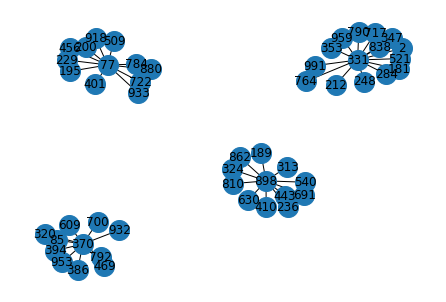

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

edges = friends[friends['Friend 1'].isin(node_list['User'])]
G = nx.from_pandas_edgelist(edges, 'Friend 1', 'Friend 2')

nx.draw(G, with_labels=True, node_size=400, font_size=12, pos = nx.spring_layout(G, k=0.18, iterations=40))
plt.show()